In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from enum import Enum

In [2]:
class   Pokemon:
    def __init__(self, name, first_type, second_type, atk, _def, hp, list_attack):
        self._name = name
        self._first_type = first_type
        self._second_type = second_type
        self._atk = atk
        self._def = _def
        self._hp = hp
        self._list_attack = list_attack
        self._number_movements = 0
    
    def get_name(self):
        return self._name
    
    def get_first_type(self):
        return self._first_type
    
    def get_second_type(self):
        return self._second_type
    
    def get_atk(self):
        return self._atk
    
    def get_def(self):
        return self._def
    
    def get_hp(self):
        return self._hp
    
    def get_number_movements(self):
        return self._number_movements
    
    def get_list_attack(self):
        return self._list_attack
    
    def set_name(self, name):
        self._name = name
    
    def set_first_type(self, type):
        self._first_type = type
    
    def set_second_type(self, type):
        self._second_type = type
    
    def set_atk(self, atk):
        self._atk = atk
    
    def set_def(self, _def):
        self._def = _def
    
    def set_hp(self, hp):
        self._hp = hp
    
    def set_list_attack(self, list_attack):
        self._list_attack = list_attack
    
    def attack(self):
        number = random.randint(0, len(self._list_attack)-1)
        return number
    
    def learn_move(self, move):
        if len(self._list_attack) <= 4:
            if (self._first_type == move.get_type()) or (self._second_type == move.get_type()):
                self._list_attack.append(move)
                return True
            else:
                return False
        else:
            return False
    
    def damage(self, damage):
        self._hp -= damage
    
    def healing(self, heal):
        self._hp += heal

In [3]:
class Move:
    def __init__(self, name, type, damage):
        self._name = name
        self._type = type
        self._damage = damage
    
    def get_name(self):
        return self._name
    
    def get_type(self):
        return self._type
    
    def get_damage(self):
        return self._damage
    
    def set_name(self, name):
        self._name = name
    
    def set_type(self, type):
        self._type = type
    
    def set_damage(self, damage):
        self._damage = damage

In [4]:
class Type(Enum):
    fire = 0
    water = 1
    normal = 2
    electric = 3
    flying = 4
    fighting = 5
    psychic = 6
    ghost = 7
    dark = 8
    dragon = 9
    grass = 10
    rock = 11
    fairy = 12
    ice = 13
    poison = 14

Turn: Pikachu
Pikachu uses the move Energy ball
Turn: Squirtle
Squirtle uses the move water gun


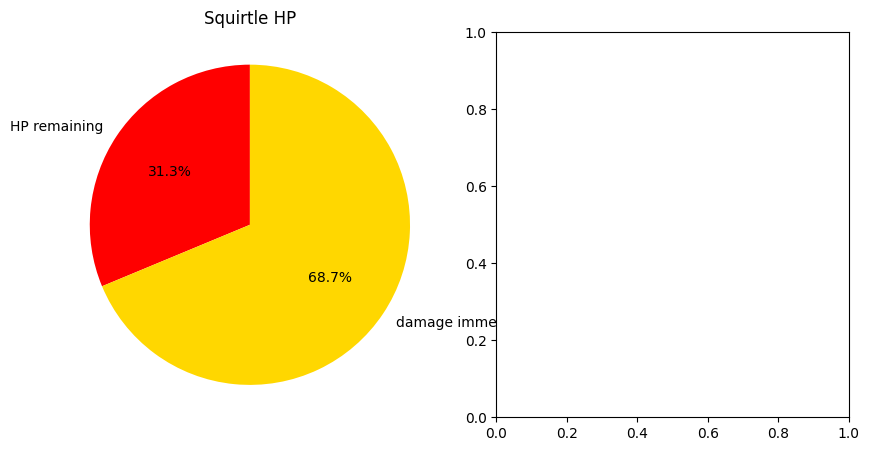

Turn: Pikachu
Pikachu uses the move Energy ball
Turn: Squirtle
Squirtle uses the move water gun


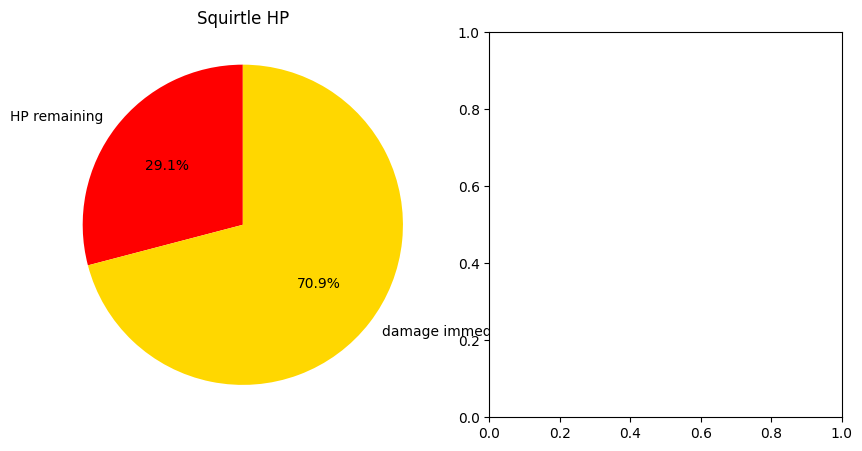

Turn: Pikachu
Pikachu uses the move Energy ball
Turn: Squirtle
Squirtle uses the move water gun


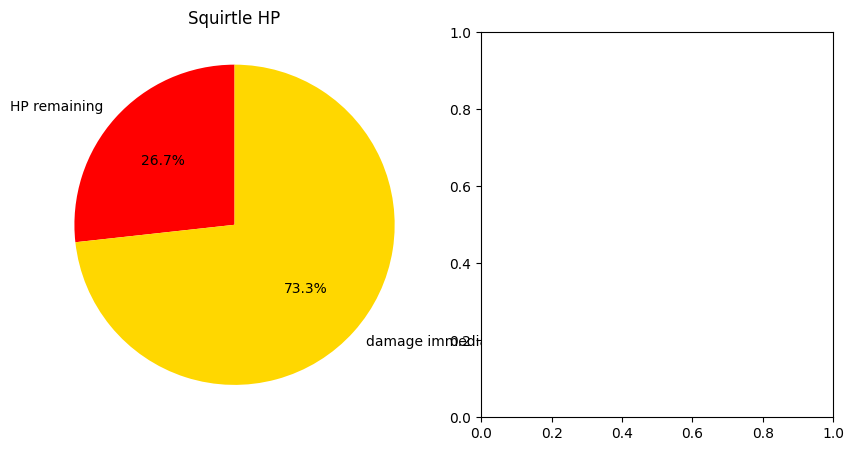

Turn: Pikachu
Pikachu uses the move Energy ball
Turn: Squirtle
Squirtle uses the move water gun


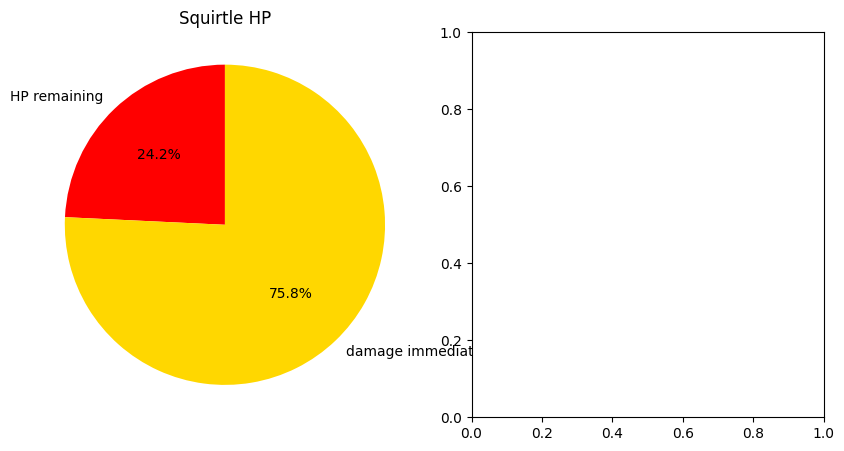

Turn: Pikachu
Pikachu uses the move Energy ball
Turn: Squirtle
Squirtle uses the move water gun


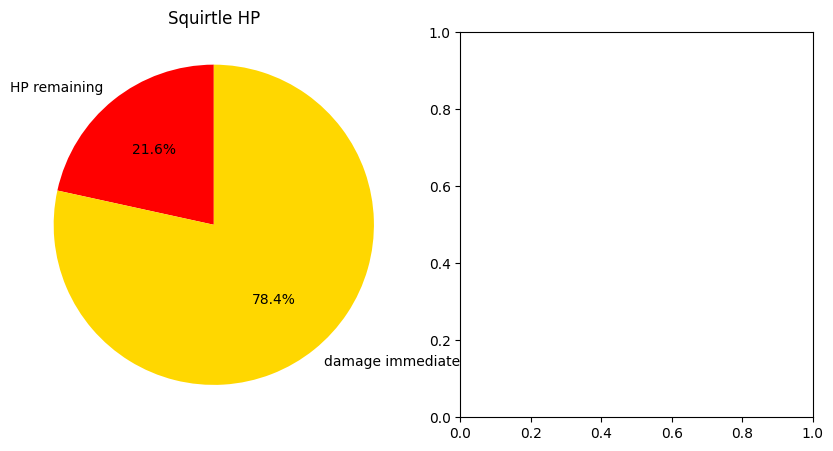

Turn: Pikachu
Pikachu uses the move Energy ball
Turn: Squirtle
Squirtle uses the move water gun


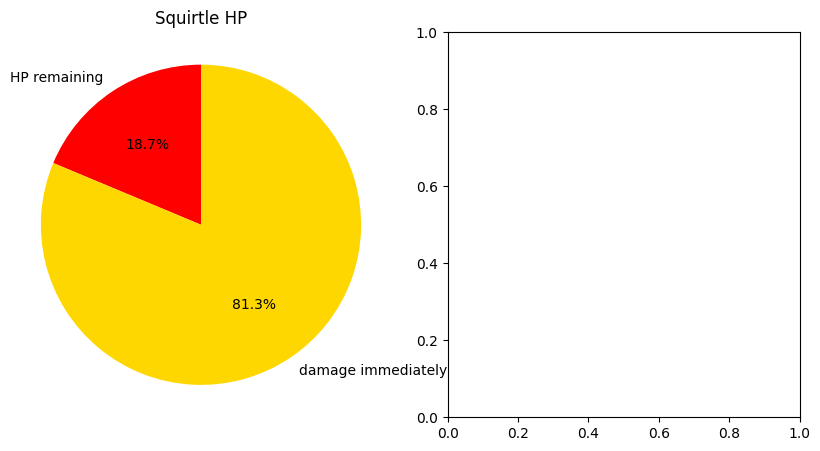

Turn: Pikachu
Pikachu uses the move Energy ball
Turn: Squirtle
Squirtle uses the move water gun


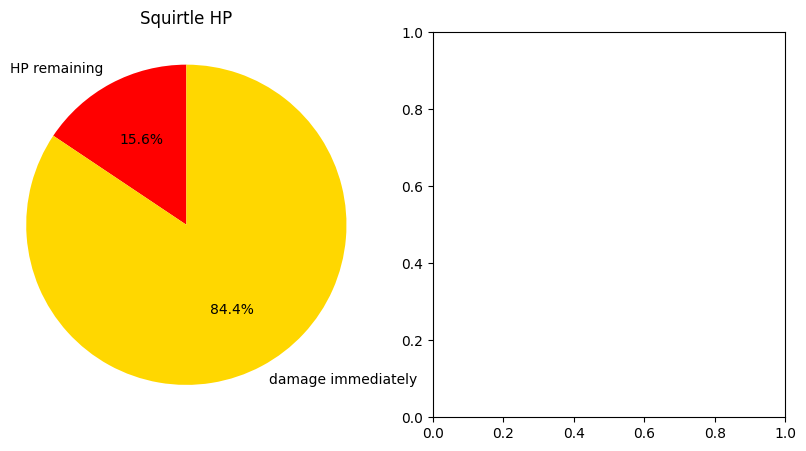

Turn: Pikachu
Pikachu uses the move Energy ball
Turn: Squirtle
Squirtle uses the move water gun


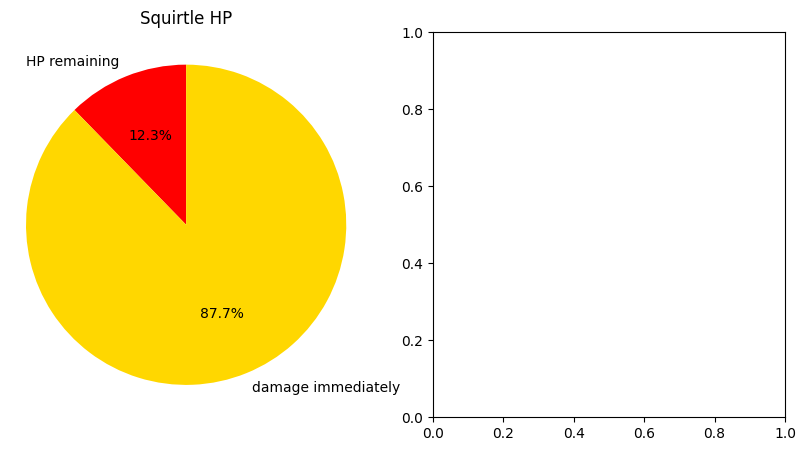

Turn: Pikachu
Pikachu uses the move Energy ball
Turn: Squirtle
Squirtle uses the move water gun


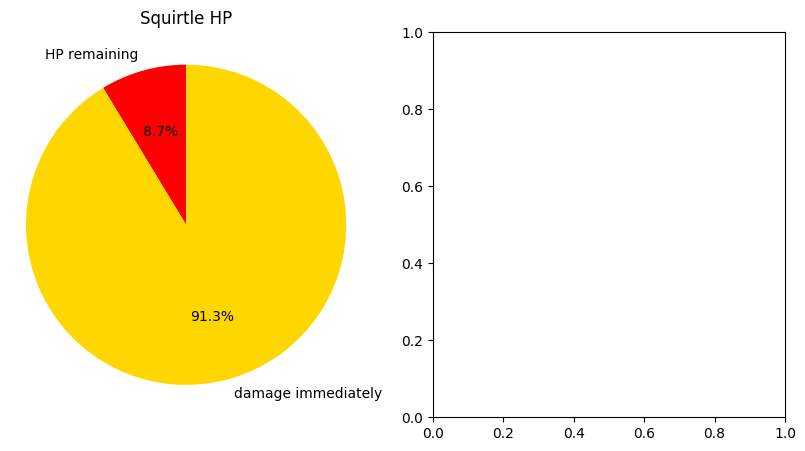

Turn: Pikachu
Pikachu uses the move Energy ball
Turn: Squirtle
Squirtle uses the move water gun


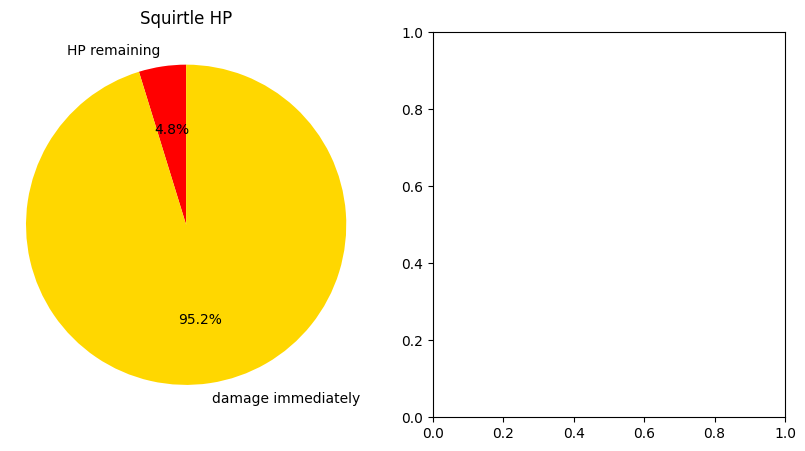

Turn: Pikachu
Pikachu uses the move Energy ball
Turn: Squirtle
Squirtle uses the move water gun


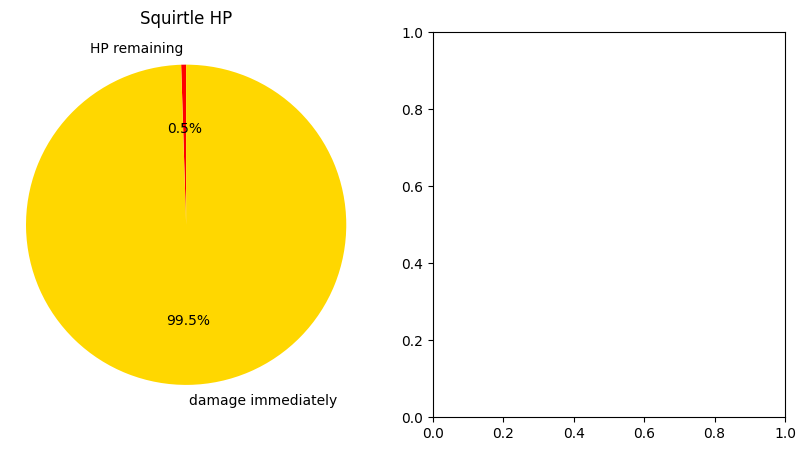

Turn: Pikachu
Pikachu uses the move Energy ball
The Pokemon Pikachu has won!


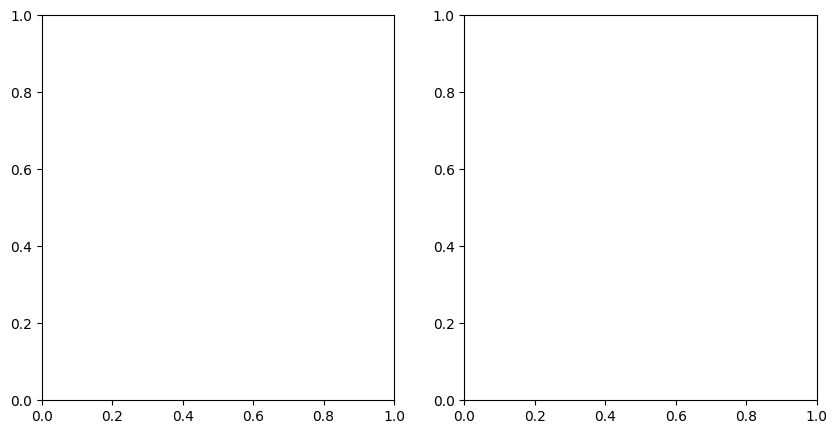

In [5]:
class Clash:
    def __init__(self, poke1, poke2):
        self._poke1 = poke1
        self._poke2 = poke2
    
    def get_poke1(self):
        return self._poke1
    
    def get_poke2(self):
        return self._poke2
    
    def set_poke1(self, pokemon):
        self._poke1 = pokemon
    
    def set_poke2(self, pokemon):
        self._poke2 = pokemon
    
    def fight(self):
        hp_max_poke1 = self._poke1.get_hp()
        hp_max_poke2 = self._poke2.get_hp()
        categories = ["HP remaining", "damage immediately"]
        while True:
            fig, axs = plt.subplots(1, 2, figsize=(10, 5))       
            print(f"Turn: {self._poke1.get_name()}")
            m = self._poke1.attack()
            print(self._poke1.get_name() + " uses the move " + self._poke1.get_list_attack()[m].get_name())
            d = self._poke1.get_list_attack()[m].get_damage()
            dama = d + self._poke1.get_atk()
            if (dama >= 0):
                defen = dama * self._poke1.get_def() / 100
                dama -= defen
                self._poke2.damage(dama)
            else:
                self._poke1.healing(dama)
            
            p = 100 * self._poke1.get_hp() / hp_max_poke1
            
            
            if self._poke2.get_hp() <= 0:
                return f"The Pokemon {self._poke1.get_name()} has won!"
            
            print(f"Turn: {self._poke2.get_name()}")
            m = self._poke2.attack()
            print(f"{self._poke2.get_name()} uses the move {self._poke2.get_list_attack()[m].get_name()}")
            d = self._poke2.get_list_attack()[m].get_damage()
            dama = d + self._poke2.get_atk()
            if (dama >= 0):
                defen = dama * self._poke1.get_def() / 100
                dama -= defen
                self._poke1.damage(dama)
            else:
                self._poke2.healing(dama)
            
            p = 100 * self._poke2.get_hp() / hp_max_poke2
            perc = [p, hp_max_poke2]
            axs[0].pie(perc, labels=categories, autopct="%1.1f%%", startangle=90, colors=["red", "gold"])
            axs[0].set_title(f"{self._poke2.get_name()} HP")
            axs[0].axis("equal")
            plt.show()

            p = 100 * self._poke1.get_hp() / hp_max_poke1
            perc = [p, hp_max_poke1]
            axs[1].pie(perc, labels=categories, autopct="%1.1f%%", startangle=90, colors=["red", "gold"])
            axs[1].set_title(f"{self._poke1.get_name()} HP")
            axs[1].axis("equal")
            plt.show()
            

            if self._poke1.get_hp() <= 0:
                return f"The Pokemon {self._poke2.get_name()} has won!"

energyball = Move("Energy ball", Type.electric, 10)
water_gun = Move("water gun", Type.water, 10)
pika = Pokemon("Pikachu", "elettro", None, 10, 10, 200, [energyball])
squirtle = Pokemon("Squirtle", "acqua", None, 5, 15, 200, [water_gun])
c = Clash(pika, squirtle)
print(c.fight())